# Simple script to transform exported GeoModeller 3-D regular grid into MOOSE grid

Note: we don't create a proper FE mesh here, but simply perform a "mapping" between a predefined mesh structure (in this case: a simple regular mesh, defined in MOOSE) and an exported GeoModeller model - with all limitations concerning refinement, problem size, etc. - however: a good way to get the first tests running!

In [31]:
# some basic imports:
import numpy as np
import os
import matplotlib.pyplot as plt
# for 3-D visualisation:
import ipyvolume.pylab as p3

## Load exported GeoModeller file

We use here simply the export functionality of GeoModeller (note: far better results can be achieved with a dedicated export using the API). The exported file has some header information and then the formations simply listed in an $x$-dominant way.

We load this file here in a simple structure:

In [32]:
class GeoExport(object):
    
    def __init__(self, filename):
        """Load exported model"""
        self.filename = filename
        
    def load_file(self):
        """Load file"""
        pass

In [33]:
voxet_file = r'/Users/flow/Documents/01_work/61_simulation_results/PerthBasin/notebooks/voxet_NPB.vox'

In [34]:
vf = open(voxet_file, 'r').readlines()

In [35]:
vf_header = vf[:10]
vf_entries = vf[10:]

In [36]:
# remove newlines and convert to numpy array
vf_entries = np.array([entry.rstrip() for entry in vf_entries])

In [37]:
# determine all formation names in model:
form_names = np.unique(vf_entries)

In [38]:
nx, ny, nz = int(vf_header[0].rstrip().split(" ")[1]),\
int(vf_header[1].rstrip().split(" ")[1]),\
int(vf_header[2].rstrip().split(" ")[1])

In [39]:
nx, ny, nz

(200, 580, 28)

In [87]:
nx * ny * nz

3248000

In [40]:
# create dictionary with formation names
formation_dict = {}
for i in range(len(form_names)):
    formation_dict[form_names[i]] = i

In [41]:
formation_dict

{'Basement': 0,
 'Cattamarra_Coal_Measures': 1,
 'DefaultCover': 2,
 'Eneabba_Fm': 3,
 'Kockatea_Shale': 4,
 'Late_Permian': 5,
 'Lesueur_Ss': 6,
 'Neocomian_Unc': 7,
 'Topo_and_bathy': 8,
 'Woodada_Fm': 9,
 'Yarragadee_Fm': 10,
 'Yigarn': 11,
 'out': 12}

In [42]:
# read file and transform string arrays into appropriate integer values
vox_int = [int(formation_dict[entry]) for entry in vf_entries]
vox_int = np.array(vox_int, dtype='int')

In [43]:
# reshape into 3-D array
vox_3d = vox_int.reshape(nz, ny, nx)

In [64]:
# swap axes to get x,y,z array
vox_3d = np.swapaxes(vox_3d, 0, 2)

## Some quick checks in 2-D slices:

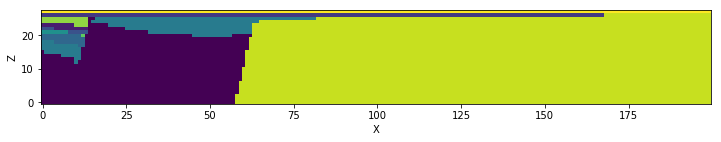

In [65]:
plt.figure(figsize=(12,4))
plt.imshow(vox_3d[:,-1,:].transpose(), origin='bottom')
plt.xlabel('X')
plt.ylabel('Z')
plt.show()

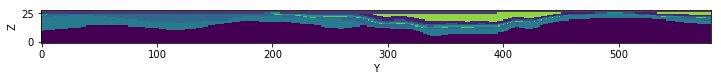

In [66]:
plt.figure(figsize=(12,4))
plt.imshow(vox_3d[0,:,:].transpose(), origin='bottom')
plt.xlabel('Y')
plt.ylabel('Z')
plt.show()

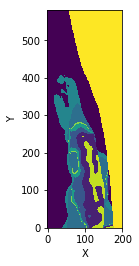

In [67]:
plt.figure(figsize=(12,4))
plt.imshow(vox_3d[:,:,0].transpose(), origin='bottom')
plt.xlabel('X')
plt.ylabel('Y')
plt.show()

## And as a 3-D view:

In [88]:
import ipyvolume
ipyvolume.quickvolshow(vox_3d)

/Users/flow/anaconda3/lib/python3.6/site-packages/ipyvolume/serialize.py:27: RuntimeWarning: invalid value encountered in true_divide
  gradient = gradient / np.sqrt(gradient[0]**2 + gradient[1]**2 + gradient[2]**2)
Widget Javascript not detected.  It may not be installed or enabled properly.


In [69]:
# extract submodel for faster vis-test
nx_sub = nz
ny_sub = 80
nz_sub = nz

x = np.arange(nx_sub)
y = np.arange(ny_sub)
z = np.arange(nz_sub)
X,Y,Z = np.meshgrid(y,x,z)

# extract subvolume
vox_sub = vox_3d[:nx_sub, :ny_sub, :nz_sub]
vox_sub = np.swapaxes(vox_sub, 0, 2)

In [70]:
ipyvolume.quickvolshow(vox_sub)
# vox_sub.shape

/Users/flow/anaconda3/lib/python3.6/site-packages/ipyvolume/serialize.py:27: RuntimeWarning: invalid value encountered in true_divide
  gradient = gradient / np.sqrt(gradient[0]**2 + gradient[1]**2 + gradient[2]**2)
Widget Javascript not detected.  It may not be installed or enabled properly.


In [71]:
np.unique(vox_sub)

array([ 0,  1,  2,  3,  4,  5,  6,  9, 10, 12])

In [72]:
# create colour array:
nc = np.max(vox_sub)
vox_c = [plt.cm.viridis(i/nc)[:3] for i in vox_sub.ravel()]

In [73]:
print(X.ravel().shape)
print(vox_sub.ravel().shape)

(62720,)
(62720,)


In [74]:
p3.figure()
p3.scatter(X.ravel(), Y.ravel(), Z.ravel(), color=vox_c, marker='box', size=3.4)

/Users/flow/anaconda3/lib/python3.6/site-packages/traitlets/traitlets.py:565: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  silent = bool(old_value == new_value)
Widget Javascript not detected.  It may not be installed or enabled properly.


In [75]:
p3.show()

Widget Javascript not detected.  It may not be installed or enabled properly.


## Export model

Simply store as np array:

In [84]:
np.save("PB_sub.txt", vox_sub)

In [86]:
vox_sub.shape

(28, 80, 28)